In [1]:
import numpy as np
# from keras.models import Sequential
# from keras.layers import Dense, Activation
# from keras.optimizers import SGD, RMSprop
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

%matplotlib inline




In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
batch_size = 100
n_batch = mnist.train.num_examples // batch_size

In [4]:
# for input & output
x = tf.placeholder(tf.float32,[None,784])
y = tf.placeholder(tf.float32,[None,10])


Iter 0, Testing Accuracy 0.8974
Iter 1, Testing Accuracy 0.9082
Iter 2, Testing Accuracy 0.9129
Iter 3, Testing Accuracy 0.9158
Iter 4, Testing Accuracy 0.9181
Iter 5, Testing Accuracy 0.9204
Iter 6, Testing Accuracy 0.922
Iter 7, Testing Accuracy 0.9217
Iter 8, Testing Accuracy 0.9215
Iter 9, Testing Accuracy 0.9225
Iter 10, Testing Accuracy 0.9234
Iter 11, Testing Accuracy 0.9231
Iter 12, Testing Accuracy 0.9236
Iter 13, Testing Accuracy 0.924
Iter 14, Testing Accuracy 0.9248
Iter 15, Testing Accuracy 0.9247
Iter 16, Testing Accuracy 0.9245
Iter 17, Testing Accuracy 0.9253
Iter 18, Testing Accuracy 0.9259
Iter 19, Testing Accuracy 0.9277


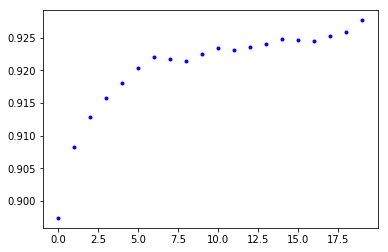

In [6]:
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
prediction = tf.nn.softmax(tf.matmul(x,W)+b)

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=prediction))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

init=tf.global_variables_initializer()
# init=tf.initialize_all_variables()

correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(prediction,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction,tf.float32))


# gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
gpu_options = tf.GPUOptions(allow_growth=True)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))
# sess=tf.Session()

epochs=20
sess.run(init)
for epoch in range(epochs):
    for batch in range(n_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        sess.run(train_step, feed_dict={x:batch_xs, y:batch_ys})
    
    acc = sess.run(accuracy, feed_dict={x:mnist.test.images, y:mnist.test.labels})
    plt.plot(epoch, acc, "b.")
    print("Iter " + str(epoch) + ", Testing Accuracy " + str(acc))
    
    




In [21]:
# sess.run(W)
a=tf.constant(66)
b=tf.constant(77)
sess.run(a+b)

143